In [4]:
# WEEK-1

# import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
import pandas as pd
df=pd.read_csv('D:/Smart_waste_detection/RecycleVision/taco_binary_annotations.csv')
df.head()

,image_id,category_id,supercategory,label
0,0,6,Bottle,Recyclable
1,1,18,Carton,Recyclable
2,1,14,Carton,Recyclable
3,2,5,Bottle,Recyclable
4,2,7,Bottle cap,Recyclable


In [3]:
# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_id       4784 non-null   int64 
 1   category_id    4784 non-null   int64 
 2   supercategory  4784 non-null   object
 3   label          4784 non-null   object
dtypes: int64(2), object(2)
memory usage: 149.6+ KB
None
          image_id  category_id
count  4784.000000  4784.000000
mean    756.936037    34.079013
std     445.884396    20.081707
min       0.000000     0.000000
25%     354.750000    12.000000
50%     743.000000    36.000000
75%    1154.000000    57.000000
max    1499.000000    59.000000
image_id         0
category_id      0
supercategory    0
label            0
dtype: int64


In [ ]:
# WEEK-2 

Shape of dataset: (4784, 4)

Column names: Index(['image_id', 'category_id', 'supercategory', 'label'], dtype='object')

Data types:
 image_id          int64
category_id       int64
supercategory    object
label            object
dtype: object

First 5 rows:
   image_id  category_id supercategory       label
0         0            6        Bottle  Recyclable
1         1           18        Carton  Recyclable
2         1           14        Carton  Recyclable
3         2            5        Bottle  Recyclable
4         2            7    Bottle cap  Recyclable

Missing values in each column:
image_id         0
category_id      0
supercategory    0
label            0
dtype: int64

Statistical summary (numerical columns):
          image_id  category_id
count  4784.000000  4784.000000
mean    756.936037    34.079013
std     445.884396    20.081707
min       0.000000     0.000000
25%     354.750000    12.000000
50%     743.000000    36.000000
75%    1154.000000    57.000000
max    1499.0000

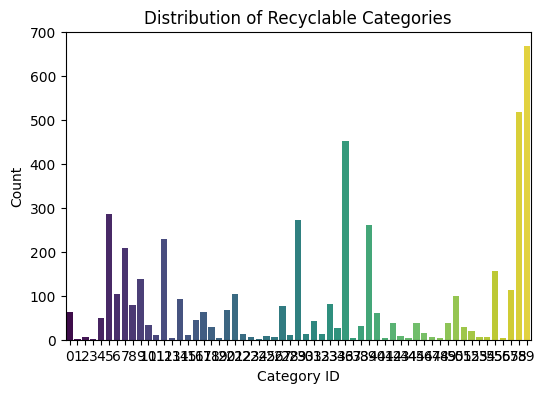

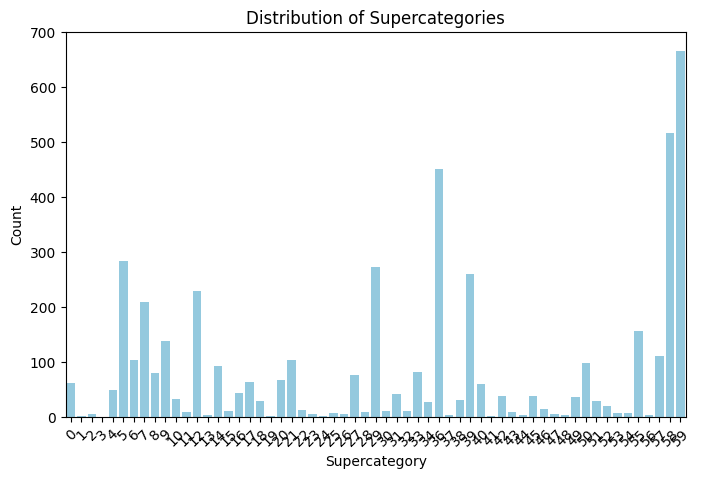

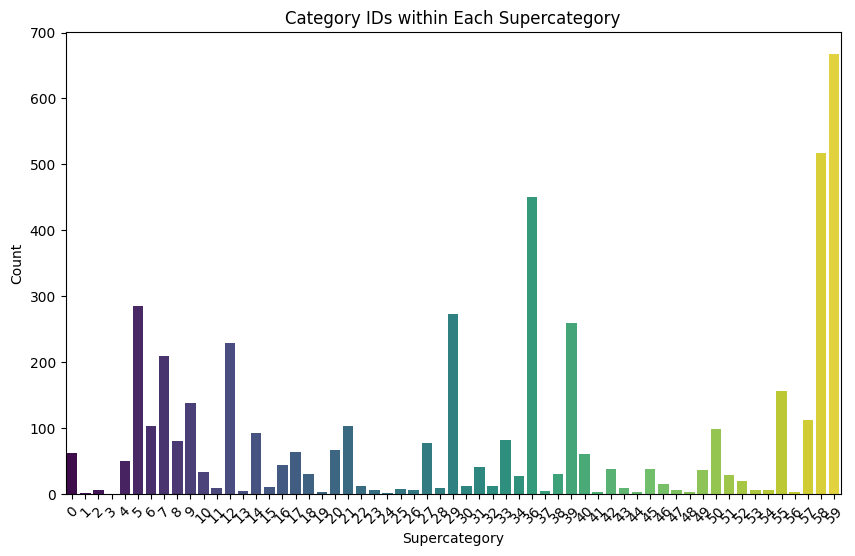

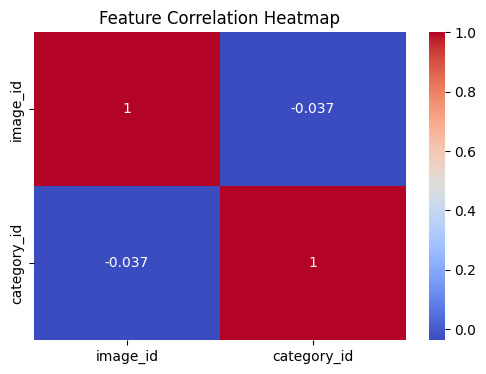

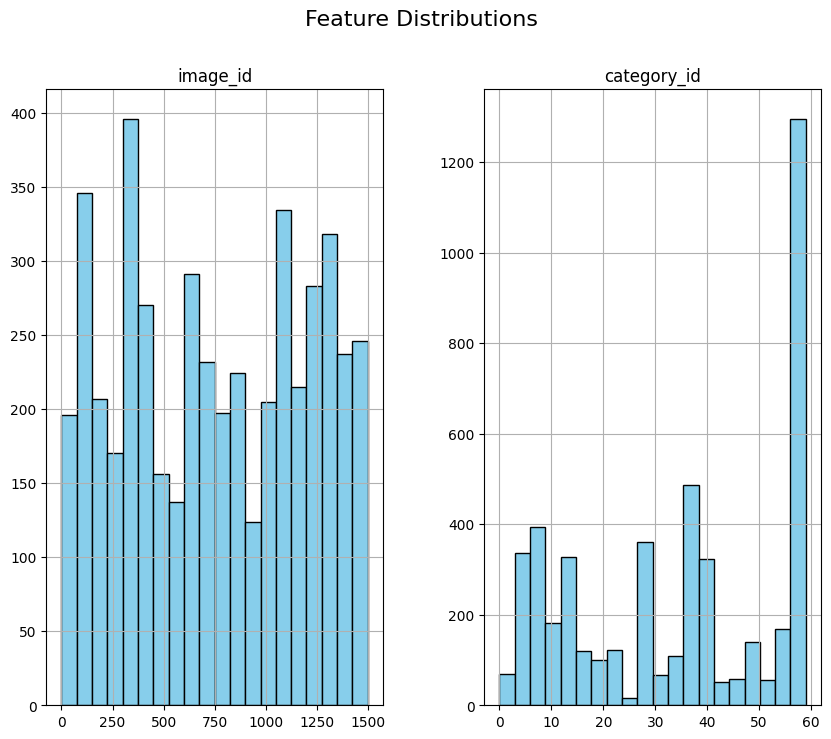

In [5]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

df = pd.read_csv('D:/Smart_waste_detection/RecycleVision/taco_binary_annotations.csv')

# Basic Info

print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nData types:\n", df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nStatistical summary (numerical columns):")
print(df.describe())

# Distribution of Categories

plt.figure(figsize=(6,4))
sns.countplot(x="category_id", hue="category_id", data=df, palette="viridis", legend=False)
plt.title("Distribution of Recyclable Categories")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()

# Distribution of Supercategories

plt.figure(figsize=(8,5))
sns.countplot(x="category_id", data=df, color="skyblue")
plt.title("Distribution of Supercategories")
plt.xlabel("Supercategory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Relationship: Category vs Supercategory

plt.figure(figsize=(10,6))
sns.countplot(x="category_id", hue="category_id", data=df, palette="viridis", legend=False)
plt.title("Category IDs within Each Supercategory")
plt.xlabel("Supercategory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap (if any numeric columns exist)

numeric_df = df.select_dtypes(include=[np.number])  # select numeric cols
if not numeric_df.empty:
    plt.figure(figsize=(6,4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.show()

# Histogram of Numeric Columns

if not numeric_df.empty:
    numeric_df.hist(figsize=(10,8), bins=20, color="skyblue", edgecolor="black")
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()


In [6]:
# Data Transformation

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('D:/Smart_waste_detection/RecycleVision/taco_binary_annotations.csv')

# 1. Drop ID column (not useful for ML)
df = df.drop(columns=["image_id"])

# 2. Encode categorical variables
# Encode supercategory (string -> numeric)
le_super = LabelEncoder()
df["supercategory_encoded"] = le_super.fit_transform(df["supercategory"])

# 3. Target variable (category_id)
# If it's not numeric, encode it
if df["category_id"].dtype == "object":
    le_cat = LabelEncoder()
    df["category_id"] = le_cat.fit_transform(df["category_id"])

# 4. Feature scaling 
scaler = StandardScaler()
df["supercategory_scaled"] = scaler.fit_transform(df[["supercategory_encoded"]])

# Final transformed dataset
print(df.head())


   category_id supercategory       label  supercategory_encoded  \
0            6        Bottle  Recyclable                      3   
1           18        Carton  Recyclable                      7   
2           14        Carton  Recyclable                      7   
3            5        Bottle  Recyclable                      3   
4            7    Bottle cap  Recyclable                      4   

   supercategory_scaled  
0             -1.237196  
1             -0.726464  
2             -0.726464  
3             -1.237196  
4             -1.109513  


In [7]:
# Feature selection

# Target 
y = df["category_id"]

# Features 
X = df.drop(columns=["category_id"])  

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
  supercategory       label  supercategory_encoded  supercategory_scaled
0        Bottle  Recyclable                      3             -1.237196
1        Carton  Recyclable                      7             -0.726464
2        Carton  Recyclable                      7             -0.726464
3        Bottle  Recyclable                      3             -1.237196
4    Bottle cap  Recyclable                      4             -1.109513

Target (y):
0     6
1    18
2    14
3     5
4     7
Name: category_id, dtype: int64


In [ ]:
# Week-3

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('D:/Smart_waste_detection/RecycleVision/taco_binary_annotations.csv')  # replace with your file name

# Separate features and labels
X = df.drop('label', axis=1)  # features
y = df['label']               # target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3827, 3)
Testing set size: (957, 3)


In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_dataset = "D:/Smart_waste_detection/RecycleVision/archive/Garbage classification/Garbage classification"   # your current folder with cardboard, glass, metal, etc.
new_dataset = "dataset_binary"

# Define recyclable categories
recyclable_classes = ["cardboard", "glass", "metal", "paper", "plastic"]
non_recyclable_classes = ["trash"]

# Train-test split ratio
split_ratio = 0.8  # 80% train, 20% test

# Create new folders
for split in ["train", "test"]:
    for category in ["recyclable", "non_recyclable"]:
        os.makedirs(os.path.join(new_dataset, split, category), exist_ok=True)

# Helper function to move images
def move_images(class_list, label):
    for cls in class_list:
        folder = os.path.join(original_dataset, cls)
        images = os.listdir(folder)
        
        # Split into train/test
        train_imgs, test_imgs = train_test_split(images, train_size=split_ratio, random_state=42)
        
        # Move to new folders
        for img in train_imgs:
            shutil.copy(os.path.join(folder, img), os.path.join(new_dataset, "train", label, img))
        for img in test_imgs:
            shutil.copy(os.path.join(folder, img), os.path.join(new_dataset, "test", label, img))

# Move images
move_images(recyclable_classes, "recyclable")
move_images(non_recyclable_classes, "non_recyclable")

print("Dataset reorganized into binary recyclable vs non_recyclable")


Dataset reorganized into binary recyclable vs non_recyclable


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data = []
labels = []

# Paths
dataset_path = r"D:\Smart_waste_detection\RecycleVision\archive\Garbage classification\Garbage classification"
classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Map to binary labels
recyclable = ["cardboard", "glass", "metal", "paper", "plastic"]

for cls in classes:
    folder = os.path.join(dataset_path, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (64, 64))   # resize
        data.append(img.flatten())        # flatten into 1D vector
        labels.append(1 if cls in recyclable else 0)  # 1 = recyclable, 0 = trash

X = np.array(data)
y = np.array(labels)

print("Dataset shape:", X.shape, y.shape)


Dataset shape: (2527, 12288) (2527,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (2021, 12288) (2021,)
Test shape: (506, 12288) (506,)


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("✅ Model trained")


✅ Model trained


In [6]:
from skimage.feature import hog

features = []
for img in data:
    img = img.reshape(64, 64, 3)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fd = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    features.append(fd)

X = np.array(features)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (2021, 1764) (2021,)
Test shape: (506, 1764) (506,)


In [12]:
import cv2
import os

trash_folder = r"D:\Smart_waste_detection\RecycleVision\archive\Garbage classification\Garbage classification\trash"
augmented_folder = trash_folder + "_augmented"
os.makedirs(augmented_folder, exist_ok=True)

for img_name in os.listdir(trash_folder):
    img_path = os.path.join(trash_folder, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue
    
    # Flip
    flipped = cv2.flip(img, 1)
    cv2.imwrite(os.path.join(augmented_folder, "flip_" + img_name), flipped)
    
    # Rotate
    rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(os.path.join(augmented_folder, "rot_" + img_name), rotated)
    
    # Add Noise
    noise = img + (30 * np.random.randn(*img.shape)).astype(np.uint8)
    cv2.imwrite(os.path.join(augmented_folder, "noise_" + img_name), noise)


In [24]:
from sklearn.utils import resample

# Separate recyclable and trash samples
X_recycle = X[y == 1]
y_recycle = y[y == 1]

X_trash = X[y == 0]
y_trash = y[y == 0]

# Downsample recyclable to match trash count
X_recycle_down, y_recycle_down = resample(
    X_recycle, y_recycle,
    replace=False,                # don’t duplicate
    n_samples=len(y_trash),       # same size as trash
    random_state=42
)

# Merge back into a balanced dataset
X_balanced = np.vstack((X_trash, X_recycle_down))
y_balanced = np.hstack((y_trash, y_recycle_down))

print("Balanced dataset shape:", X_balanced.shape, y_balanced.shape)
print("Class distribution:", np.bincount(y_balanced))


Balanced dataset shape: (274, 1764) (274,)
Class distribution: [137 137]


In [25]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


In [26]:
# Train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7818181818181819

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.73      0.89      0.80        27

    accuracy                           0.78        55
   macro avg       0.80      0.78      0.78        55
weighted avg       0.80      0.78      0.78        55



In [28]:
import joblib

joblib.dump(model, "recyclevision_model.pkl")
print("✅ Model saved successfully!")



✅ Model saved successfully!


In [29]:
import cv2
from skimage.feature import hog
import numpy as np
import joblib

# Load saved model
model = joblib.load("recyclevision_model.pkl")

def predict_image(img_path, model):
    # Read and resize image
    img = cv2.imread(img_path)
    if img is None:
        return "Error: Image not found."
    img = cv2.resize(img, (64, 64))
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    fd = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    fd = fd.reshape(1, -1)
    
    # Predict
    pred = model.predict(fd)[0]
    return "Recyclable" if pred == 1 else "Not Recyclable"

# Example usage
result = predict_image("D:/Smart_waste_detection/RecycleVision/download.jpeg", model)
print("Prediction:", result)


Prediction: Recyclable


In [31]:
import cv2
from skimage.feature import hog
import numpy as np
import joblib

# Load saved model
model = joblib.load("recyclevision_model.pkl")

def predict_image(img_path, model):
    # Read and resize image
    img = cv2.imread(img_path)
    if img is None:
        return "Error: Image not found."
    img = cv2.resize(img, (64, 64))
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Extract HOG features
    fd = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    fd = fd.reshape(1, -1)
    
    # Predict
    pred = model.predict(fd)[0]
    return "Recyclable" if pred == 1 else "Not Recyclable"

# Example usage
result = predict_image("D:/Smart_waste_detection/RecycleVision/download (1).jpeg", model)
print("Prediction:", result)

Prediction: Not Recyclable
